# Investigate predictions on human proteome

Taking the results of our continuous predictions to find interesting sequences.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
with open('../data/uniprot/human_predictions.out') as handle:
    item = None
    human_proteome = []
    for line in handle:
        if line.startswith('>'):
            if item is not None:
                human_proteome.append(item)
            item = {
                'acc': line.strip(),
            }
        else:
            item['scores'] = [float(s) for s in line.strip().split(',')]
    if item is not None:
        human_proteome.append(item)

In [6]:
df_human_proteome = pd.DataFrame(human_proteome)

In [7]:
df_human_proteome.head()

,acc,scores
0,>sp|A0A075B6S6|KVD30_HUMAN Immunoglobulin kapp...,"[4.4033, 6.4219, 7.4319, 7.0521, 6.8488, 7.800..."
1,>sp|A0A1W2PPE2|TFKL4_HUMAN TATA-box-binding pr...,"[1.9524, 2.3147, 2.1736, 1.7253, 1.1721, 1.145..."
2,>sp|A0A5A2|TVB58_HUMAN T cell receptor beta va...,"[2.6633, 4.4268, 7.2076, 8.6347, 10.4589, 11.6..."
3,>sp|A0PJE2|DHR12_HUMAN Dehydrogenase/reductase...,"[5.5127, 8.3642, 10.1713, 10.1303, 9.5166, 9.6..."
4,>sp|A1A580|KR231_HUMAN Keratin-associated prot...,"[4.7274, 7.3639, 9.4425, 10.9083, 12.0084, 12...."


In [8]:
df_human_proteome['disorder'] = df_human_proteome['scores'].apply(lambda scores: (np.asarray(scores) <= 8).astype(int))
df_human_proteome.head()

,acc,scores,disorder
0,>sp|A0A075B6S6|KVD30_HUMAN Immunoglobulin kapp...,"[4.4033, 6.4219, 7.4319, 7.0521, 6.8488, 7.800...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ..."
1,>sp|A0A1W2PPE2|TFKL4_HUMAN TATA-box-binding pr...,"[1.9524, 2.3147, 2.1736, 1.7253, 1.1721, 1.145...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,>sp|A0A5A2|TVB58_HUMAN T cell receptor beta va...,"[2.6633, 4.4268, 7.2076, 8.6347, 10.4589, 11.6...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,>sp|A0PJE2|DHR12_HUMAN Dehydrogenase/reductase...,"[5.5127, 8.3642, 10.1713, 10.1303, 9.5166, 9.6...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,>sp|A1A580|KR231_HUMAN Keratin-associated prot...,"[4.7274, 7.3639, 9.4425, 10.9083, 12.0084, 12....","[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."


In [9]:
def get_max_lengths(arr: list) -> list:
    res = []
    acc = 0
    for d in arr:
        if d == 1:
            acc += 1
        elif acc > 0:
            res.append(acc)
            acc = 0
    return res

df_human_proteome['disorder_lengths'] = df_human_proteome['disorder'].apply(get_max_lengths)

In [99]:
df_human_proteome['max_length'] = df_human_proteome['disorder_lengths'].apply(lambda arr: np.max(arr) if len(arr) > 0 else 0)

In [103]:
df_human_proteome.nlargest(100, columns=['max_length'])

,acc,scores,disorder,disorder_lengths,max_length
7611,>sp|Q9H1E3|NUCKS_HUMAN Nuclear ubiquitous case...,"[2.63, 4.0266, 4.6973, 3.7225, 3.1837, 3.2099,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[1330],1330
17856,>sp|A0A1B0GTR4|SPRR5_HUMAN Putative small prol...,"[3.4473, 4.6681, 5.1171, 4.2916, 3.6787, 3.316...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[1326],1326
19200,>sp|O60829|PAGE4_HUMAN P antigen family member...,"[1.7704, 2.3694, 2.066, 1.5938, 0.7197, 0.4136...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[1318],1318
641,>sp|Q8TAG6|VEXIN_HUMAN Vexin OS=Homo sapiens O...,"[3.7778, 5.4639, 5.5805, 4.8217, 4.3669, 4.379...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[1308],1308
11159,>sp|Q9H320|VCX1_HUMAN Variable charge X-linked...,"[1.3135, 1.9307, 1.9511, 1.3, 0.3853, -0.1295,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[1304],1304
...,...,...,...,...,...
3475,>sp|Q5T036|F120S_HUMAN Uncharacterized protein...,"[1.0192, 1.5954, 1.5673, 1.2797, 0.8352, 0.572...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[108, 24, 1102, 6]",1102
6491,>sp|P0DPQ3|PR20G_HUMAN Proline-rich protein 20...,"[2.3688, 3.5923, 3.3825, 2.4635, 1.804, 1.6112...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[100, 1099, 3, 55, 4, 4]",1099
18921,>sp|P08123|CO1A2_HUMAN Collagen alpha-2(I) cha...,"[7.4692, 10.7686, 13.9024, 14.0343, 14.153, 14...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 5, 1099, 83, 1]",1099
12895,>tr|A0A2R8YFR7|A0A2R8YFR7_HUMAN DH domain-cont...,"[0.749, 1.5203, 2.2995, 2.5056, 2.2929, 1.9487...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1095, 39, 8, 1, 5, 1]",1095


In [105]:
df_human_proteome[df_human_proteome['max_length'] > 1000].size

1285

In [48]:
disorder_lengths = pd.Series(np.concatenate(df_human_proteome['disorder_lengths'].ravel()).ravel())

In [49]:
disorder_lengths.max()

1330.0

In [52]:
disorder_lengths[disorder_lengths.between(10, 1000)].nlargest(10)

49139     999.0
104096    999.0
137836    999.0
258151    998.0
108458    997.0
301048    997.0
30469     996.0
141083    996.0
217510    996.0
274640    996.0
dtype: float64

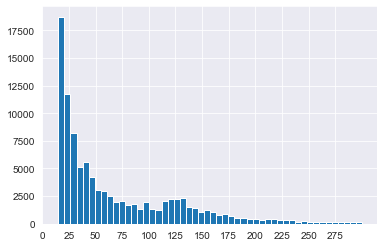

In [63]:
%matplotlib inline
fig, ax = plt.subplots()

ax.hist(disorder_lengths[disorder_lengths.between(15, 300)], bins=50)
ax.set_xticks(np.arange(0, 300, 25))

plt.show()